<a href="https://colab.research.google.com/github/kameoman/pythonlesson/blob/main/%E9%9C%80%E8%A6%81%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##１．必要な機能をダウンロードする
時系列はprophetを用いることが多い

In [ ]:
!pip3 install pystan
!pip3 install fbprophet

In [ ]:
import pandas as pd
from fbprophet import Prophet

##CSVのデータを取り込む
skiprows:特定の行をスキップ（除外）して読み込む場合、引数skiprowsを使う。

In [ ]:
_df = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2021.csv', encoding='shift-jis', skiprows=1)

In [ ]:
_df.head()

,DATE,TIME,実績(万kW)
0,2021/1/1,0:00,3184
1,2021/1/1,1:00,2978
2,2021/1/1,2:00,2834
3,2021/1/1,3:00,2743
4,2021/1/1,4:00,2697


##件数を調べる

concat：連結　

axis: どの方向へ（縦方向（行方向への連結）

In [ ]:
years = [2019,2020,2021]
# year = years [0]
df = pd.DataFrame() 
for year in years:
    _df = pd.read_csv(f'https://www.tepco.co.jp/forecast/html/images/juyo-{year}.csv', encoding='shift-jis', skiprows=1)
    df = pd.concat([df, _df], axis=0)

In [ ]:
df

,DATE,TIME,実績(万kW)
0,2019/1/1,0:00,3017
1,2019/1/1,1:00,2849
2,2019/1/1,2:00,2730
3,2019/1/1,3:00,2636
4,2019/1/1,4:00,2579
...,...,...,...
5275,2021/8/8,19:00,3717
5276,2021/8/8,20:00,3498
5277,2021/8/8,21:00,3299
5278,2021/8/8,22:00,3139


In [ ]:
df.head()

,DATE,TIME,実績(万kW)
0,2019/1/1,0:00,3017
1,2019/1/1,1:00,2849
2,2019/1/1,2:00,2730
3,2019/1/1,3:00,2636
4,2019/1/1,4:00,2579


In [ ]:
df.tail()

,DATE,TIME,実績(万kW)
5275,2021/8/8,19:00,3717
5276,2021/8/8,20:00,3498
5277,2021/8/8,21:00,3299
5278,2021/8/8,22:00,3139
5279,2021/8/8,23:00,2985


##データの前処理（インデックスのリセット）

In [ ]:
df.shape

(22824, 3)

In [ ]:
df = df.reset_index(drop=True)

##DATEとTIMEを1つのオブジェクトに格納する

In [ ]:
df['DATE'][0]

'2019/1/1'

In [ ]:
df['TIME'][0]

'0:00'

年月日＋時間の表示ができるようになる(文字列で一度合体させる）

In [ ]:
date = df['DATE'][0]
time = df['TIME'][0]
str_datetime = f'{date} {time}'
str_datetime

'2019/1/1 0:00'

datetime型へ変換(as dtは呼び名を一度変更しただけ）

In [ ]:
from datetime import  datetime as dt

In [ ]:
datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')
datetime

datetime.datetime(2019, 1, 1, 0, 0)

##for文を回してすべてのデータに反映させる

In [ ]:
datetimes = []

for index, datum in df.iterrows():
    date = datum['DATE']
    time = datum['TIME']
    str_datetime = f'{date} {time}'
    datetime = dt.strptime(str_datetime, '%Y/%m/%d %H:%M')
    datetimes.append(datetime)

In [ ]:
datetimes[:3]

[datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 1, 1, 1, 0),
 datetime.datetime(2019, 1, 1, 2, 0)]

##元の表に戻す

In [ ]:
df['ds'] = datetimes

##dsという新しいカラムを追加できる

In [ ]:
df.head()

,DATE,TIME,実績(万kW),ds
0,2019/1/1,0:00,3017,2019-01-01 00:00:00
1,2019/1/1,1:00,2849,2019-01-01 01:00:00
2,2019/1/1,2:00,2730,2019-01-01 02:00:00
3,2019/1/1,3:00,2636,2019-01-01 03:00:00
4,2019/1/1,4:00,2579,2019-01-01 04:00:00


##実績をYというカラム名に変更する


In [ ]:
df = df.rename(columns={'実績(万kW)': 'y'})
df.head()

,DATE,TIME,y,ds
0,2019/1/1,0:00,3017,2019-01-01 00:00:00
1,2019/1/1,1:00,2849,2019-01-01 01:00:00
2,2019/1/1,2:00,2730,2019-01-01 02:00:00
3,2019/1/1,3:00,2636,2019-01-01 03:00:00
4,2019/1/1,4:00,2579,2019-01-01 04:00:00


#予測モデルの構築

In [ ]:
model = Prophet()

In [ ]:
model.fit(df)

##予測するためのデータを作成していく

freqとは頻度を確認するもの。（今回は時間単位で作成）

未来のデータ365日×24時間を1時間おきに表示するデータフレームを作成する

In [ ]:
future = model.make_future_dataframe(24*365, freq='H')

In [ ]:
future.tail()

,ds
31579,2022-08-08 19:00:00
31580,2022-08-08 20:00:00
31581,2022-08-08 21:00:00
31582,2022-08-08 22:00:00
31583,2022-08-08 23:00:00


##実際に予測する
予測値を入れる(実際に電力の予測を計算してくれる）

In [ ]:
forecast = model.predict(future)

In [ ]:
import matplotlib.pyplot as plt

青色：予測値
黒色：実測値

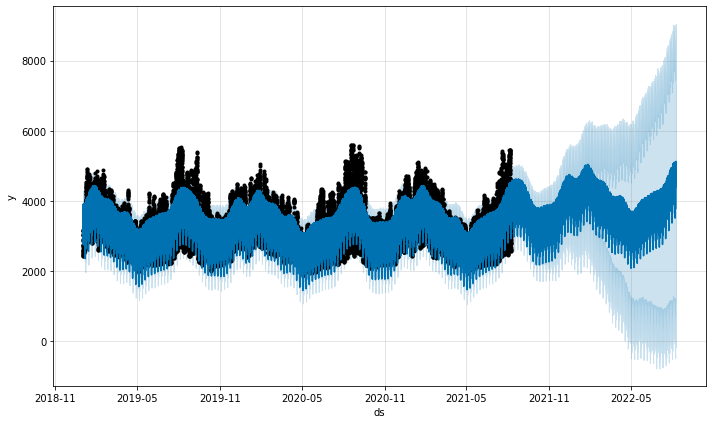

In [ ]:
model.plot(forecast)
plt.show()

#予測結果の集約（実測値と予測値をまとめる）

In [ ]:
df_2022 = pd.read_csv('https://www.tepco.co.jp/forecast/html/images/juyo-2021.csv', encoding='shift-jis', skiprows=1)

In [ ]:
df_2022.head()

,DATE,TIME,実績(万kW)
0,2021/1/1,0:00,3184
1,2021/1/1,1:00,2978
2,2021/1/1,2:00,2834
3,2021/1/1,3:00,2743
4,2021/1/1,4:00,2697


###条件付きでのデータ取得

In [ ]:
forecast_2022 = forecast[forecast['ds'] >= dt(2022,1,1)].reset_index(drop=True)

In [ ]:
forecast_2022.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01 00:00:00,3708.618682,2554.195211,4580.177698,2738.896509,4630.560527,-112.959929,-112.959929,-112.959929,-500.258555,-500.258555,-500.258555,28.086745,28.086745,28.086745,359.211882,359.211882,359.211882,0.0,0.0,0.0,3595.658753
1,2022-01-01 01:00:00,3708.687271,2470.368643,4451.066310,2738.656665,4631.173063,-241.971703,-241.971703,-241.971703,-616.780552,-616.780552,-616.780552,15.469330,15.469330,15.469330,359.339518,359.339518,359.339518,0.0,0.0,0.0,3466.715567
2,2022-01-01 02:00:00,3708.755860,2331.848887,4333.278699,2738.416821,4631.785599,-319.809688,-319.809688,-319.809688,-681.350483,-681.350483,-681.350483,2.068704,2.068704,2.068704,359.472091,359.472091,359.472091,0.0,0.0,0.0,3388.946172
3,2022-01-01 03:00:00,3708.824449,2256.105627,4278.494891,2738.176976,4632.398135,-357.900171,-357.900171,-357.900171,-705.433524,-705.433524,-705.433524,-12.076253,-12.076253,-12.076253,359.609605,359.609605,359.609605,0.0,0.0,0.0,3350.924277
4,2022-01-01 04:00:00,3708.893038,2360.231876,4376.789053,2737.937132,4633.010671,-349.726210,-349.726210,-349.726210,-682.560148,-682.560148,-682.560148,-26.918129,-26.918129,-26.918129,359.752067,359.752067,359.752067,0.0,0.0,0.0,3359.166828


In [ ]:
df_2022 = df_2022.rename(columns={'実績(万kW)': 'y'})
df_2022.head()

,DATE,TIME,y
0,2021/1/1,0:00,3184
1,2021/1/1,1:00,2978
2,2021/1/1,2:00,2834
3,2021/1/1,3:00,2743
4,2021/1/1,4:00,2697


yhat ⇒　予測値

In [ ]:
# forecast_2022['yhat']

In [ ]:
results = pd.DataFrame()

df_2022は実測値が入っている

results[t]のカラムに入れる

どれぐらい予測値と実測値差があるのか確認する（diff(引き算))

In [ ]:
#実測値
results['t'] = df_2022['y']
#予測値
results['y'] = forecast_2022['yhat']
#上記の引き算を行う
results['diff'] = results['t'] - results['y']
results.head()

,t,y,diff
0,3184,3595.658753,-411.658753
1,2978,3466.715567,-488.715567
2,2834,3388.946172,-554.946172
3,2743,3350.924277,-607.924277
4,2697,3359.166828,-662.166828


#評価指標（MAPE）
予測結果が良かったのかどうかを評価していきます。

In [ ]:
import numpy as np 

全体的に〇％ずれていますという意味

In [ ]:
np.mean(abs((results['y']- results['t'])/results['y'] )*100)

16.364995369003317

評価指標をもう少し少なくできるように、データを追加していく。
#精度向上のための施策
（データの追加休日・猛暑日をいれてみる）

In [ ]:
import pandas as pd
df_holidays =pd.read_csv('holidays.csv')
df_holidays.head()

,ds,holiday,lower_window,upper_window
0,2017/01/01 0:00:00,holiday,0,1
1,2017/01/01 1:00:00,holiday,0,1
2,2017/01/01 10:00:00,holiday,0,1
3,2017/01/01 11:00:00,holiday,0,1
4,2017/01/01 12:00:00,holiday,0,1


In [ ]:
#ｙ＝実測値
df.y.max()

5604

In [ ]:
#cap = 推測値（上限）
df['cap'] = 5700
df.head()

,DATE,TIME,y,ds,cap
0,2019/1/1,0:00,3017,2019-01-01 00:00:00,5700
1,2019/1/1,1:00,2849,2019-01-01 01:00:00,5700
2,2019/1/1,2:00,2730,2019-01-01 02:00:00,5700
3,2019/1/1,3:00,2636,2019-01-01 03:00:00,5700
4,2019/1/1,4:00,2579,2019-01-01 04:00:00,5700


In [ ]:
model = Prophet(growth='logistic',
                yearly_seasonality=True,
                weekly_seasonality=True,
                daily_seasonality=True,
                holidays=df_holidays
)

In [ ]:
model.fit(df)

In [ ]:
future['cap'] = 5700

In [ ]:
forecast = model.predict(future)

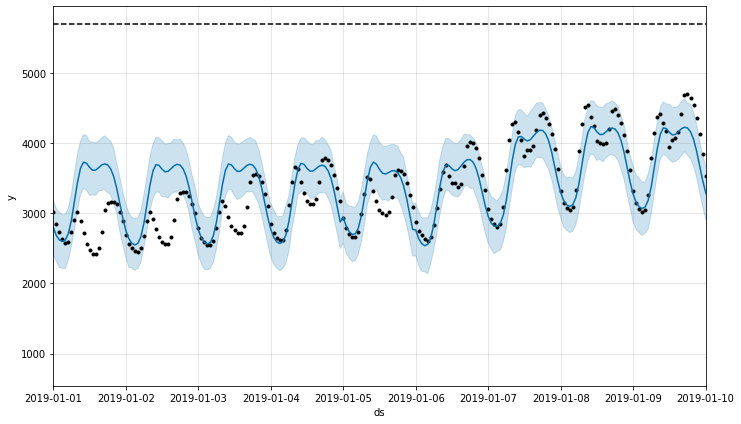

In [ ]:
model.plot(forecast)
plt.xlim(dt(2019,1,1),dt(2019,1,10))
plt.show()

In [ ]:
forecast_2022 = forecast[forecast['ds'] >= dt(2022,1,1)].reset_index(drop=True)

In [ ]:
#実測値
results['t'] = df_2022['y']
#予測値
results['y'] = forecast_2022['yhat']
#上記の引き算を行う
results['diff'] = results['t'] - results['y']
results.head()

,t,y,diff
0,3184,3227.606302,-43.606302
1,2978,3098.402262,-120.402262
2,2834,3020.430567,-186.430567
3,2743,2982.254523,-239.254523
4,2697,2990.344044,-293.344044


先ほど16％の利率が10％まで減少させることができた（猛暑日等のデータを入れることで）

In [ ]:
np.mean(abs((results['y']- results['t'])/results['y'] )*100)

10.644199440638527

#周期性の確認

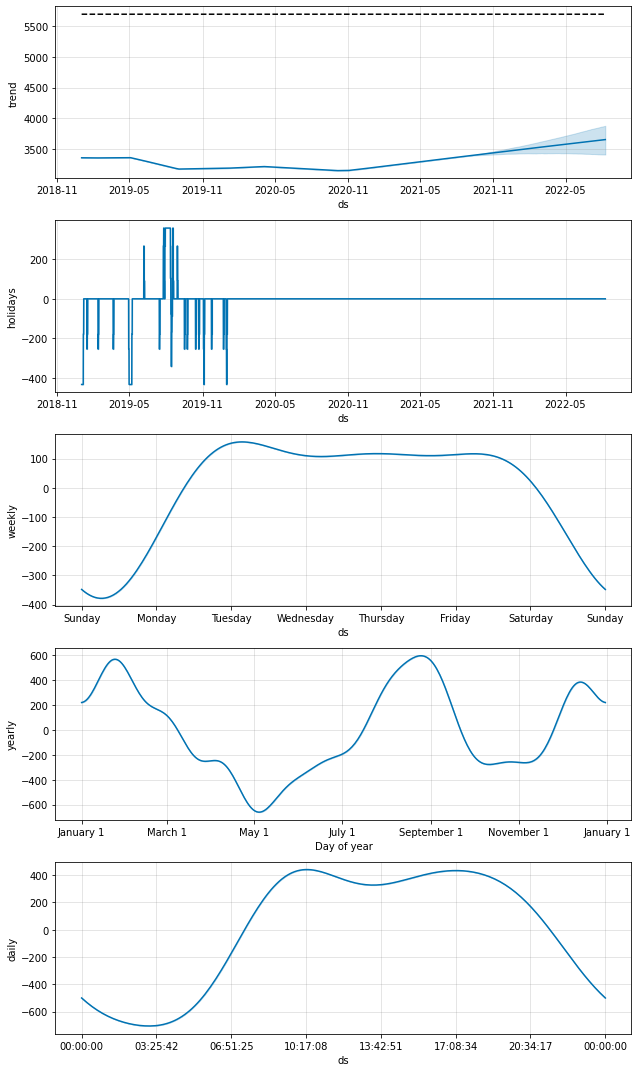

In [ ]:
model.plot_components(forecast)
plt.show()